In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
gdp = pd.read_csv("interpolated_data/gdp.csv")
fertility_rate = pd.read_csv("interpolated_data/fertility_rate.csv")

In [15]:
# only use countries that are in both tables
country_list = []
gdp_keys = gdp.keys()
fertility_rate_keys = fertility_rate.keys()

for c in gdp_keys:
    if not c in fertility_rate_keys: continue
    if c == "Unnamed: 0": continue
    country_list.append(c)

print(len(gdp_keys), len(fertility_rate_keys))
print(len(country_list))

194 210
190


[639.484735848211, 639.865909445734, 693.873474633887, 674.793383069492, 652.774321396566, 697.995596576519, 617.230435515505, 336.586994504629, 200.852219772323, 367.279225077581, 586.416133065074, 750.604449178826, 1009.97711375563, 717.380047745673, 813.789396580449, 1033.24253162418, 1126.68334010717, 1281.6598256178, 1425.12421860142, 1846.12012081207, 2373.58129170055, 2673.78780296036, 2972.74361818169, 3595.03830207997, 4370.53971115737, 4114.13404061058, 4094.34969883571, 4437.14114631148, 4247.63135624709, 4413.06339738921, 4578.63320812155, 3952.80358410846, 4124.05538986272, 4531.03220675893, 5287.66081699731, 5396.21422690995, 5343.0377039956, 6377.20309553753, 6802.80451885113] [3.296, 3.205, 3.116, 3.061, 3.004, 2.942, 2.9, 2.826, 2.767, 2.707, 2.707, 2.685, 2.615, 2.497, 2.397, 2.318, 2.231, 2.15, 2.036, 1.978, 1.89, 1.803, 1.724, 1.671, 1.648, 1.647, 1.656, 1.671, 1.692, 1.697, 1.674, 1.613, 1.551, 1.491, 1.44, 1.414, 1.4, 1.39, 0.6243474352194607]


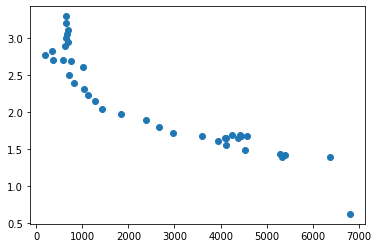

In [37]:
c_gdp = list(gdp.get("Albania"))
c_fr = list(fertility_rate.get("Albania"))
x, y = [], []

for i in range(len(c_gdp)):
    if c_gdp[i] == -1 or c_fr == -1: continue
    else:
        x.append(c_gdp[i])
        y.append(c_fr[i])

print(x, y)

plt.scatter(x, y)
plt.show()

In [38]:
np.corrcoef(np.array(x), np.array(y))

array([[ 1.        , -0.92016496],
       [-0.92016496,  1.        ]])

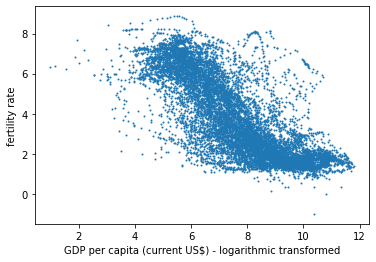

array([[ 1.        , -0.76175388],
       [-0.76175388,  1.        ]])

In [76]:
# let's do that for all countries
x, y = [], []

def add_values(c):
    c_gdp = list(gdp.get(c))
    c_fr = list(fertility_rate.get(c))
    
    for i in range(len(c_gdp)):
        if c_gdp[i] == -1 or c_fr == -1: continue
        else:
            x.append(c_gdp[i])
            y.append(c_fr[i])

for c in country_list:
    add_values(c)

x = list(np.log(np.array(x)))

plt.scatter(x, y, s=1)
plt.xlabel("GDP per capita (current US$) - logarithmic transformed")
plt.ylabel("fertility rate")
plt.show()

np.corrcoef(np.array(x), np.array(y))

In [77]:
from tqdm import tqdm
hp_x = (np.array(x) * 10).astype(int)
hp_y = (np.array(y) * 10).astype(int)

print(np.max(hp_x), np.max(hp_y))

heatmap = list(np.zeros((120, 90)))

print(np.unique(hp_x, return_counts=True))

# for i in tqdm(hp_x):
    # for j in hp_y:
        # heatmap[i][j] += 1

118 88
(array([  9,  11,  15,  18,  19,  20,  21,  23,  25,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118]), array([  1,   1,   1,   1,   1,   1,   1,   1,   2,   1,   2,   3,   4,
         6,   3,   4,  10,   7,  14,   8,  10,  16,  18,  22,  36,  28,
        41,  42,  59,  68,  90,  88, 100, 110, 115, 133, 161, 191, 195,
       193, 178, 182, 177, 192, 171, 180, 184, 221, 243, 214, 191, 192,
       206, 209, 212, 208, 179, 201, 215, 206, 195, 189, 203, 197, 206,
       219, 159, 169, 173, 175, 182, 158, 140, 153, 135, 140, 117, 12

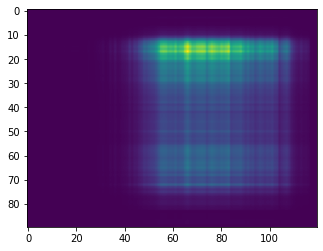

In [70]:
plt.imshow(np.array(heatmap).T)
plt.show()